In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score

# Load the diabetes dataset


In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [5]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [6]:
label_encoder_gender = LabelEncoder()
df['gender'] = label_encoder_gender.fit_transform(df['gender'])
label_encoder_smoking = LabelEncoder()
df['smoking_history'] = label_encoder_smoking.fit_transform(df['smoking_history'])

In [7]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [8]:
X = df[['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']]

In [9]:
y = df['diabetes']

# Split the data into training, validation and testing sets

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Try to choose the best model

### Choose k for knn

In [11]:
k_values = range(1,10)
accuracies = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracies.append(acc)

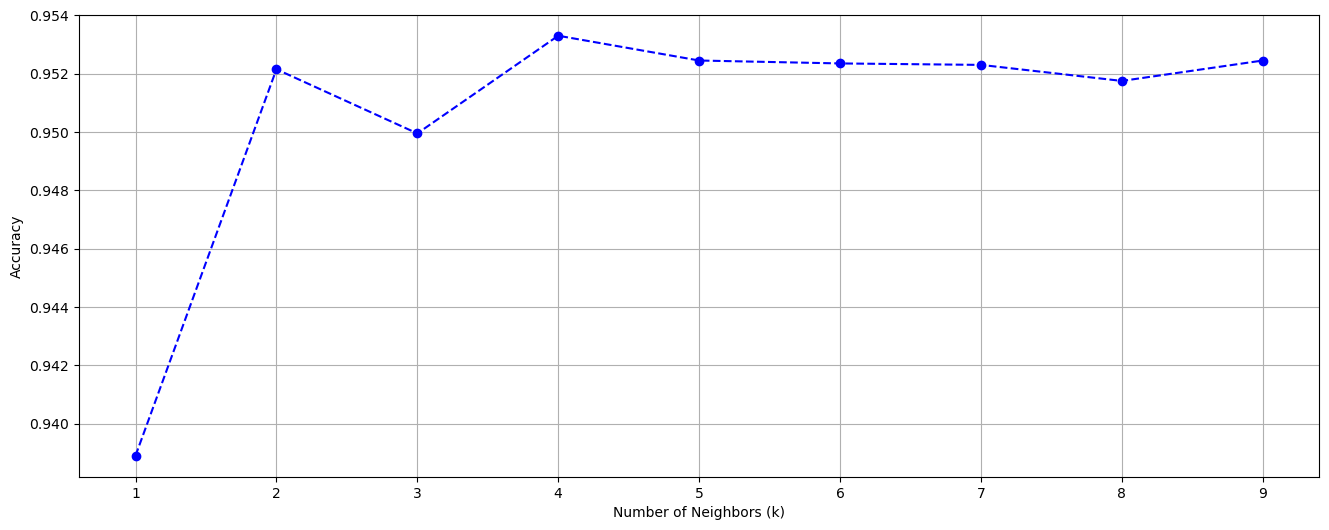

In [12]:
plt.figure(figsize=(16, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='dashed', color='b')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid()
plt.show()

In [13]:
best_k = k_values[np.argmax(accuracies)]
best_accuracy = max(accuracies)
print(f"The optimal number of neighbors is k = {best_k} with an accuracy of {best_accuracy:.2f}")

The optimal number of neighbors is k = 4 with an accuracy of 0.95


### Compare models

In [14]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=300),
    'Decision Tree': DecisionTreeClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier(best_k),
    'Support Vector Machine': SVC()
}

In [15]:
model_performance = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    
    model_performance[name] = {'model': model, 'accuracy':accuracy, 'precision': precision}
    
    print(f"{name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision score: {precision:.4f}")
    print()

Logistic Regression Results:
Accuracy: 0.9587
Precision score: 0.8646

Decision Tree Results:
Accuracy: 0.9537
Precision score: 0.7217

K-Nearest Neighbors Results:
Accuracy: 0.9533
Precision score: 0.9388

Support Vector Machine Results:
Accuracy: 0.9474
Precision score: 1.0000



In [16]:
best_model_name = max(model_performance, key=lambda x: (model_performance[x]['accuracy'] + model_performance[x]['precision']) / 2)

best_model = model_performance[best_model_name]['model']

print(f"The best model is: {best_model_name} with an accuracy of {model_performance[best_model_name]['accuracy']:.4f} and precision of {model_performance[best_model_name]['precision']:.4f}")

The best model is: Support Vector Machine with an accuracy of 0.9474 and precision of 1.0000
